<a href="https://colab.research.google.com/github/Luna-ber/Projects-Machine-Learning/blob/main/Proyecto_ML_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automatico/Copia de Copia de Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print (df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:

# Definir las características (X) y la variable objetivo (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Convertir variables categóricas a numéricas usando one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Manejar valores faltantes (puedes usar otras estrategias como imputación)
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_val_train , X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

model = LogisticRegression()
model.fit(X_val_train, y_val_train)
y_pred = model.predict(X_val_test)
accuracy = accuracy_score(y_val_test, y_pred)
print("Precisión del modelo de Regresión Logística:", accuracy)

Precisión del modelo de Regresión Logística: 0.786096256684492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejoracion del modelo utilizando ingenieria de variables

In [ ]:
# Ingeniería de características
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Tamaño de la familia
df['IsAlone'] = (df['FamilySize'] == 1).astype(int) # Si viaja solo
df['FarePerPerson'] = df['Fare'] / df['FamilySize'] # Precio del ticket por persona
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # Titulo
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Convertir variables categóricas a numéricas usando one-hot encoding
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

               PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId       1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived         -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass           -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age               0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp            -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch            -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare              0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
FamilySize       -0.040143  0.016639  0.065997 -0.301914  0.890712  0.783111   
IsAlone           0.057462 -0.203367  0.135207  0.198270 -0.584471 -0.583398   
FarePerPerson     0.026303  0.221600 -0.485079  0.150763 -0.094682 -0.068978   
Title             0.003878  0.407753 -0.173929 -0.104766  0.269623  0.315784   

                   Fare  FamilySize   I

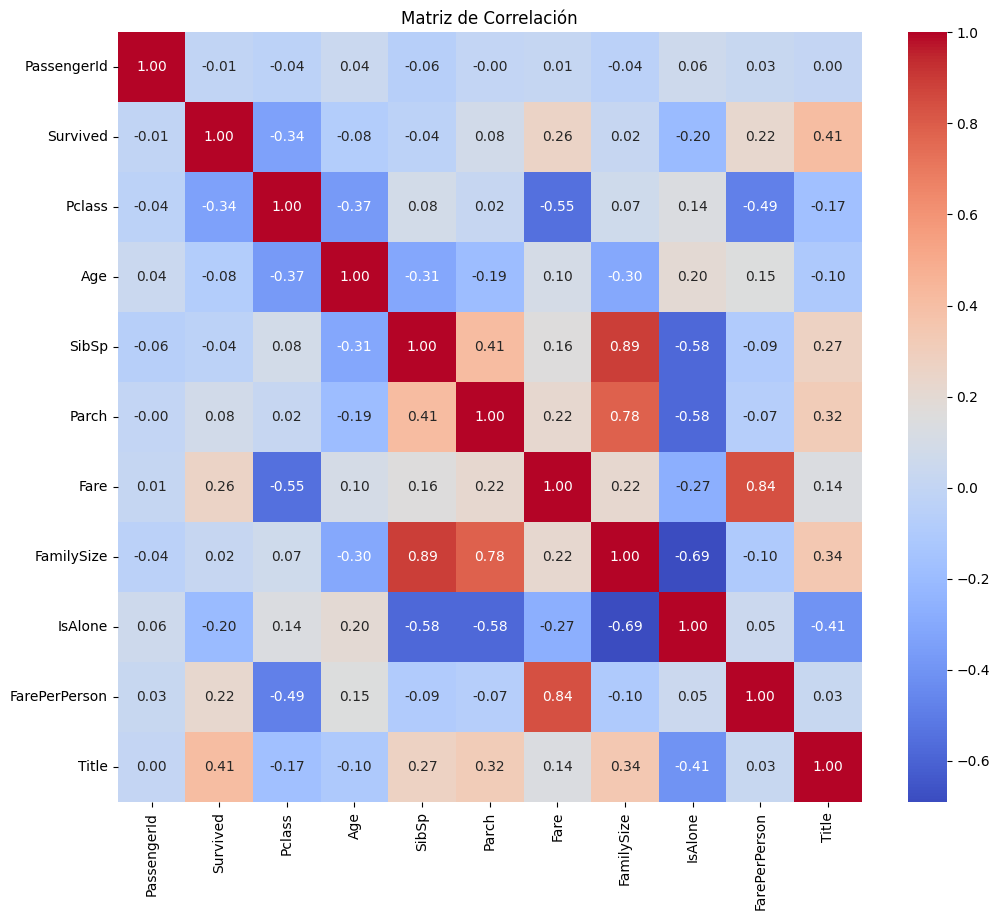

In [ ]:

# Seleccionar las columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=np.number).columns

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Title']]
y = df['Survived']

# ----> Convertir 'Sex' and 'Embarked' to numerical using OneHotEncoder <----
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Sex', 'Embarked']
encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)


# Manejar valores faltantes (puedes usar otras estrategias como imputación)
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_val_train , X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=43)

# Entrenar el modelo
rf_model.fit(X_val_train, y_val_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_val_test)

# Evaluar el modelo
accuracy = accuracy_score(y_val_test, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

Precisión del modelo Random Forest: 0.8181818181818182


In [ ]:
#MUTUAL INFORMATION

# Calcular la información mutua entre las características y la variable objetivo
mi = mutual_info_classif(X, y)

# Crear un DataFrame para mostrar la información mutua
mi_scores = pd.DataFrame({'Característica': X.columns, 'Información Mutua': mi})

# Ordenar las características por información mutua en orden descendente
mi_scores = mi_scores.sort_values('Información Mutua', ascending=False)

# Mostrar la información mutua
print(mi_scores)

  Característica  Información Mutua
5          Title           0.167997
6       Sex_male           0.159047
4  FarePerPerson           0.148761
0         Pclass           0.084219
2     FamilySize           0.053785
1            Age           0.046419
9   Embarked_nan           0.027991
8     Embarked_S           0.014858
3        IsAlone           0.000354
7     Embarked_Q           0.000000


In [ ]:
# Ingeniería de características adicional: elevar algunas columnas al cuadrado
X['Age_squared'] = X['Age'] ** 2
X['FamilySize_squared'] = X['FamilySize'] ** 2
X['FarePerPerson_squared'] = X['FarePerPerson'] ** 2
X['Title_squared'] = X['Title'] ** 2

# Ingeniería de características adicional: interacciones entre variables
X['Age_Pclass'] = X['Age'] * X['Pclass']
X['FarePerPerson_FamilySize'] = X['FarePerPerson'] * X['FamilySize']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=43)

 # Entrenar el modelo con los datos de entrenamiento de validación
rf_model.fit(X_val_train, y_val_train)

# Hacer predicciones en el conjunto de validación
y_pred_val = rf_model.predict(X_val_train)

# Evaluar el modelo en el conjunto de validación
accuracy_val = accuracy_score(y_val_train, y_pred_val)
print("Precisión del modelo Random Forest en validación:", accuracy_val)


Precisión del modelo Random Forest en validación: 0.9701834862385321
